In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Import the fastai.vision.all library, because we will be classifying MNIST hand written digits.**

In [43]:
from fastai.vision.all import *

**pathlib will let us use the path library to get access to our dataset.**

In [45]:
from pathlib import Path

In [46]:
path = Path('../input/mnist-dataset/trainingSet/trainingSet')

In [47]:
path.ls()

(#10) [Path('../input/mnist-dataset/trainingSet/trainingSet/7'),Path('../input/mnist-dataset/trainingSet/trainingSet/2'),Path('../input/mnist-dataset/trainingSet/trainingSet/5'),Path('../input/mnist-dataset/trainingSet/trainingSet/8'),Path('../input/mnist-dataset/trainingSet/trainingSet/0'),Path('../input/mnist-dataset/trainingSet/trainingSet/3'),Path('../input/mnist-dataset/trainingSet/trainingSet/1'),Path('../input/mnist-dataset/trainingSet/trainingSet/4'),Path('../input/mnist-dataset/trainingSet/trainingSet/9'),Path('../input/mnist-dataset/trainingSet/trainingSet/6')]

Path.ls() gives us the list of all files in the folder

In [48]:
fns = get_image_files(path)
fns

(#42000) [Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_16279.jpg'),Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_30197.jpg'),Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_36225.jpg'),Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_13700.jpg'),Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_14245.jpg'),Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_20091.jpg'),Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_26418.jpg'),Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_8663.jpg'),Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_6440.jpg'),Path('../input/mnist-dataset/trainingSet/trainingSet/7/img_20970.jpg')...]

**get_image_files will give us all the images inside the training set folder**

In [49]:
Mnist = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y= parent_label,
    item_tfms=Resize(32))

**A Datablock is one of the best option in FASTAI, which save our  time by this simple datablock class , where we can set our data and align it with our labels**

In [50]:
dls = Mnist.dataloaders(path)

After setting and aligning our data in the datablock, we use the dataloader to load the data created by datablock to a variable here we use "dls"

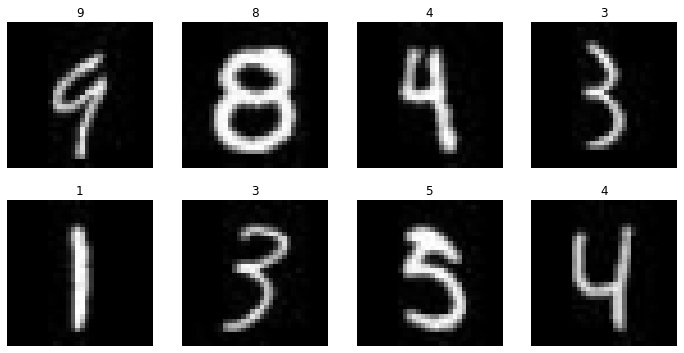

In [51]:
dls.valid.show_batch(max_n=8, nrows=2)

Here we confirm that the datablock is created correctly, as you can see the labels and images are correctly matched

In [52]:
learn = cnn_learner(dls, resnet34, pretrained=False,
 loss_func=F.cross_entropy, metrics=error_rate)

We use transfer learning in this example using a pre trained model Resnet. but here we use the architecture of resnet but we set retrained = false.. and train it from start.

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0030199517495930195)

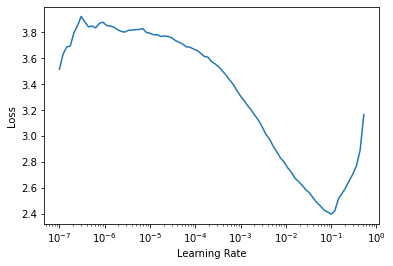

In [53]:
learn.lr_find()

Lr_find() is the best function of FastAI which gives us suggestions about the learning rate.. so we can get good results even with few epochs

In [54]:
learn.fine_tune(5,1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.348447,1.110449,0.362857,01:31


epoch,train_loss,valid_loss,error_rate,time
0,0.255121,0.192584,0.055357,01:32
1,0.152262,0.142989,0.042857,01:33
2,0.074823,0.089127,0.023333,01:33
3,0.034352,0.075941,0.020238,01:34
4,0.016689,0.067774,0.017381,01:35


With 5 epochs only we got the error rate 0.0173 which is very good actually

In [55]:
learn.export()

We export our trained model and saved it

In [56]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [60]:
learn_inf = load_learner(path/'export.pkl')

In [62]:
learn_inf.predict('../input/mnist-dataset/testSet/testSet/img_1.jpg')

("['9', '8', '9', '9', '0', '6', '8', '9', '8', '6']",
 tensor([-1.1029, -2.2111,  9.8838, -1.9934, -0.6303, -4.7623, -2.2273, -1.7826,
         -2.2386, -4.3399]),
 tensor([-1.1029, -2.2111,  9.8838, -1.9934, -0.6303, -4.7623, -2.2273, -1.7826,
         -2.2386, -4.3399]))

In [63]:
learn_inf.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [84]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

We test our trained model by uploading a picture from test set

In [85]:
img = PILImage.create(btn_upload.data[-1])

In [86]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

we uploaded 7

In [87]:
pred,pred_idx,probs = learn_inf.predict(img)

In [92]:
probs

tensor([-2.5211, -1.7326, -0.4539, -1.1277, -1.1501, -1.9637, -2.9417,  7.9154,
        -1.6517,  1.9265])

it can be seen that the probility of 7 is very high.. so the model predicted correctly